#introduction to machine learning
##pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [23]:
first_name= "َAmir Hossein"
last_name= "Yari"
student_number= "99102507"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [25]:
#load the data set and fill nan value with 0
# TODO (load dataset)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Fill nan value with 0
x_train[np.isnan(x_train)] = 0
x_test[np.isnan(x_test)] = 0

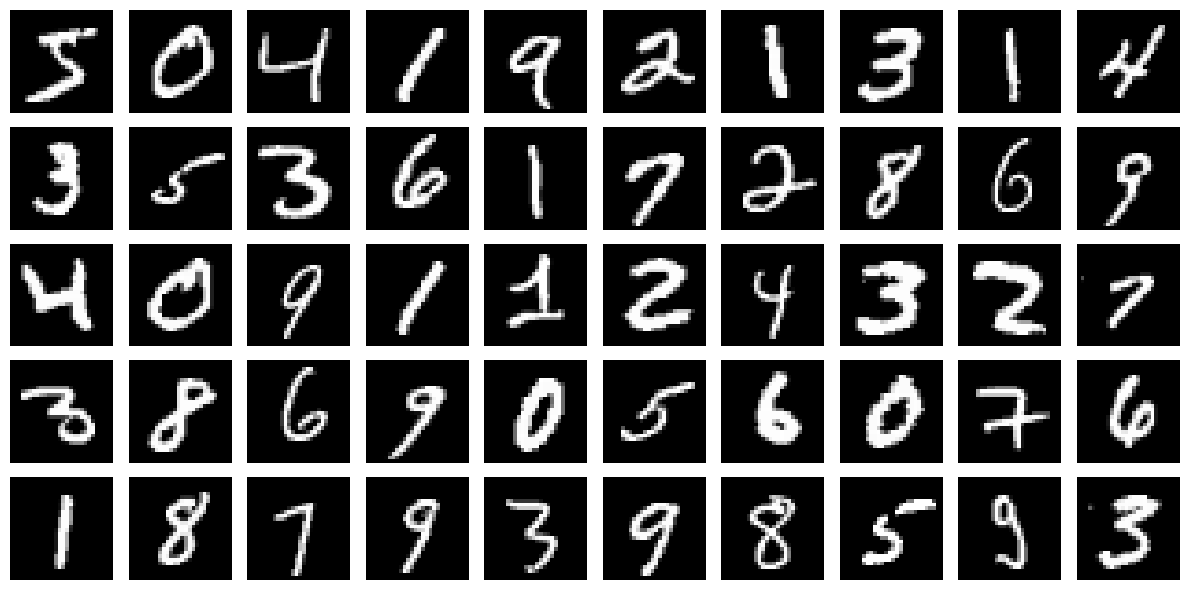

In [26]:
# here show 50 first of this images

def show_images(num_images,X):
    # TODO (implement show images function)
    #inputs dataset and number of images wants to show

    #output plot images
    fig, axes = plt.subplots(5, 10, figsize=(12, 6))
    for i, ax in enumerate(axes.ravel()[:num_images]):
        ax.imshow(X[i], cmap='gray')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

show_images(50,x_train)

In [60]:
#TODO scale the data set to [0 1]
#divide data to maximum value .

# Vectorize the images
x_train_vec = x_train.reshape(x_train.shape[0], -1)  # Reshape to (60000, 784)
x_test_vec = x_test.reshape(x_test.shape[0], -1)     # Reshape to (10000, 784)

# Scale the dataset by dividing by the maximum value
x_train_normal = x_train_vec / np.max(x_train_vec)
x_test_normal = x_test_vec / np.max(x_test_vec)

در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [61]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.
# Calculate the covariance matrix
cov_matrix = np.cov(x_train_normal, rowvar=False)

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort the eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [64]:
explained_variance = 0.8 # you can change this variable to get more component of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.
#TODO

# Calculate the total variance from eigenvalues
total_variance = np.sum(eigenvalues)

k = 0
accumulated_variance = 0.0
for i in range(len(eigenvalues)):
    k += 1
    accumulated_variance += eigenvalues[i] / total_variance
    if accumulated_variance >= explained_variance:
        break

# Calculate the compression ratio
compression_ratio = x_train_normal.shape[1] / k

print("Number of components to explain {:.0%} of the variance: {}".format(explained_variance, k))
print("Compression ratio: {:.2f}".format(compression_ratio))

Number of components to explain 80% of the variance: 44
Compression ratio: 17.82


حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

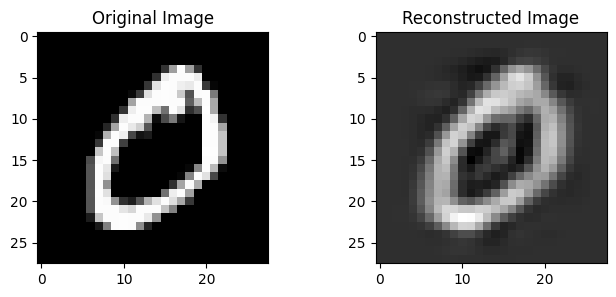

In [65]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
#select on sample and reshape it to a 28 by 28 matrix and plot them as image

#TODO
#plot the dimentionally reduced data
#plot the original data

# Select the top 'k' eigenvectors and create the projection matrix
projection_matrix = eigenvectors[:, :k]

# Reduce the data to 'k' dimensions
reduced_data = np.dot(x_train_normal, projection_matrix)

# Reconstruct the data
reconstructed_data = np.dot(reduced_data, projection_matrix.T) * np.max(x_train_vec)

# Reshape the reconstructed data to the original shape
reconstructed_images = reconstructed_data.reshape(-1, 28, 28)

# Choose an example image to visualize
original_image = x_train[1]
reconstructed_image = reconstructed_images[1]

# Plot the original image, reduced representation, and reconstructed image
plt.figure(figsize=(8, 3))
plt.subplot(121)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')

plt.subplot(122)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image, cmap='gray')

plt.show()

## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [67]:
#complete below function using python PCA function
def do_pca(n_components, data):
  #input number of component and not normalized data set.
  #output is the projected dataset
  # TODO

  pca = PCA(n_components=n_components)
  projected_data = pca.fit_transform(data)
  return projected_data

In [73]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.

def ML_model(X, y, print_output=True):
    #define ML model inputs dataset and lables
    #output accuracy of model on dataset
    # TODO

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

    # Create and train the Random Forest Classifier model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy
    acc = accuracy_score(y_test, y_pred)

    if print_output:
        print(f"Model Accuracy: {acc:.2%}")

    return acc

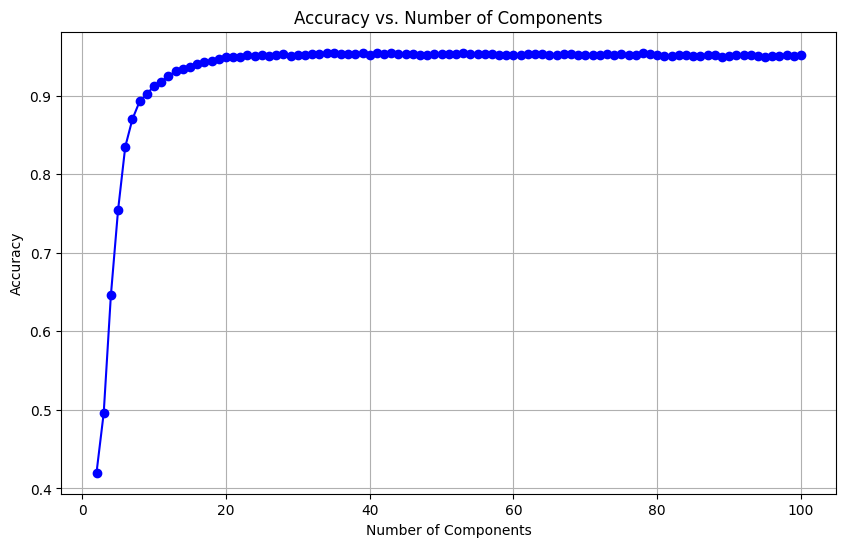

In [78]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
#TODO
X = np.concatenate((x_train_vec, x_test_vec), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

acc_list, pc_list = [], []
for pc in range(2,101):
    #TODO
    # Apply PCA to reduce dimensionality
    X_reduced = do_pca(pc, X)

    # Calculate accuracy using the ML_model function
    accuracy = ML_model(X_reduced, y, print_output=False)

    acc_list.append(accuracy)
    pc_list.append(pc)

# Plot the accuracy vs. number of components
plt.figure(figsize=(10, 6))
plt.plot(pc_list, acc_list, marker='o', linestyle='-', color='b')
plt.title("Accuracy vs. Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [1]:
#plot the accuracy based on components.
#TODO
# Plotted above.

In [81]:
#print the number of components that maximize the accuracy and the max accuracy
#TODO
max_accuracy = max(acc_list)
optimal_num_components = pc_list[acc_list.index(max_accuracy)]
print(f"Number of Components that Maximize Accuracy: {optimal_num_components}")
print(f"Maximum Accuracy: {max_accuracy:.2%}")

Number of Components that Maximize Accuracy: 78
Maximum Accuracy: 95.48%
